Pandas object:
    * Series
    * Dataframes
    * Index

In [2]:
import numpy as np
import pandas as pd

# The Pandas Series Object

a one-dimensional array of indexed data. It can be created from a list or array

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
print(data[1],'\n')
print(data[1:3])

0.5 

1    0.50
2    0.75
dtype: float64


### Series as generalized NumPy array

while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

the index need not be an integer, but can consist of values of any desired type.

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [8]:
data['b']

0.5

can even use non-contiguous or non-sequential indice

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [10]:
data[5]

0.5

### Series as specialized dictionary

just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations

In [11]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [12]:
population['California']

38332521

In [13]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

## Constructing Series objects

pd.Series(data, index=index)

In [14]:
pd.Series([2, 4, 6])   # data can be a list or NumPy array

0    2
1    4
2    6
dtype: int64

In [15]:
pd.Series(5, index=[100, 200, 300])   # data can be a scalar, which is repeated to fill the specified index

100    5
200    5
300    5
dtype: int64

In [16]:
pd.Series({2:'a', 1:'b', 3:'c'})   # data can be a dictionary, in which index defaults to the sorted dictionary key

2    a
1    b
3    c
dtype: object

In [17]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])   # to choose while creating

3    c
2    a
dtype: object

# The Pandas DataFrame Object

analog of a two-dimensional array with both flexible row indices and flexible column names.
DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.

In [18]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [19]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [20]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [21]:
states.columns

Index(['population', 'area'], dtype='object')

In [22]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

## Constructing DataFrame objects

In [23]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [24]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [25]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [26]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.902865,0.559714
b,0.871984,0.444645
c,0.532113,0.780782


In [27]:
A = np.zeros(3, dtype=[('C', 'i8'), ('B', 'f8')])
pd.DataFrame(A)

,C,B
0,0,0.0
1,0,0.0
2,0,0.0


## The Pandas Index Object

an immutable array or as an ordered set (technically a multi-set, as Index objects may contain repeated values)

In [28]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [29]:
print(ind[1])
print(ind[::2])

3
Int64Index([2, 5, 11], dtype='int64')


In [30]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


### Index as ordered set

In [31]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [32]:
print(indA & indB ,'intersection')
print(indA | indB, 'union')
print(indA ^ indB , 'symmetric difference')
print(indA.intersection(indB))

Int64Index([3, 5, 7], dtype='int64') intersection
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64') union
Int64Index([1, 2, 9, 11], dtype='int64') symmetric difference
Int64Index([3, 5, 7], dtype='int64')


# Data Indexing and Selection

## Data Selection in Series

In [33]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [34]:
print(data['b'])
print('a' in data)
print(data.keys())
print(list(data.items()))

0.5
True
Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]


In [35]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [36]:
# slicing by explicit index
print(data['a':'c'])
print(type(data['a':'c']), '\n')
# slicing by implicit integer index
print(data[0:2])
print(type(data[0:2]),'\n')
# masking
print(data[(data > 0.3) & (data < 0.8)])
print(type(data[(data > 0.3) & (data < 0.8)]), '\n')
# fancy indexing
print(data[['a', 'e']])
print(type(data[['a', 'e']]),'\n')

a    0.25
b    0.50
c    0.75
dtype: float64
<class 'pandas.core.series.Series'> 

a    0.25
b    0.50
dtype: float64
<class 'pandas.core.series.Series'> 

b    0.50
c    0.75
dtype: float64
<class 'pandas.core.series.Series'> 

a    0.25
e    1.25
dtype: float64
<class 'pandas.core.series.Series'> 



Notice that when slicing with an explicit index (i.e., data['a':'c']), the final index is included in the slice, while when slicing with an implicit index (i.e., data[0:2]), the final index is excluded from the slice.

### Indexers: loc, iloc, and ix

In [37]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [38]:
# explicit index when indexing
data[1]

'a'

In [39]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Therefore, use loc and iloc

the loc attribute allows indexing and slicing that always references the explicit index

In [40]:
print(data.loc[1],'\n')
print(data.loc[1:3])

a 

1    a
3    b
dtype: object


The iloc attribute allows indexing and slicing that always references the implicit Python-style index

In [41]:
print(data.iloc[1],'\n')
print(data.iloc[1:3])

b 

3    b
5    c
dtype: object


## Data Selection in DataFrame

In [42]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [43]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [44]:
data.area   # only use if column names are in strings

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [45]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [46]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [47]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [48]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [49]:
data.loc['Texas':'Illinois', :'pop']

,area,pop
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [50]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [51]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [52]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# Operating on Data in Pandas

In [53]:
import pandas as pd
import numpy as np

### Ufuncs: Index Preservation

In [54]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [55]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [56]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [57]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### UFuncs: Index Alignment

In [58]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
print(area,'\n')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
print(population,'\n')

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64 

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64 



In [59]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [60]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [61]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

In [62]:
A+B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [63]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index alignment in DataFrame

In [64]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
A+B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [65]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


In [66]:
'''
Python Operator	Pandas Method(s)
+	add()
-	sub(), subtract()
*	mul(), multiply()
/	truediv(), div(), divide()
//	floordiv()
%	mod()
**	pow()
'''
print()

### Ufuncs: Operations Between DataFrame and Series

Operations between a DataFrame and a Series are similar to operations between a two-dimensional and one-dimensional NumPy array. 

In [67]:
A = rng.randint(10, size=(3, 4))
A 

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [68]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [69]:
df = pd.DataFrame(A, columns=list('QRST'))
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [70]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [71]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [72]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [73]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# Handling Missing Data

To indicate the presence of missing data in a table or DataFrame
* using a mask that globally indicates missing values, 
* or choosing a sentinel value that indicates a missing entry.

use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra (often non-optimized) logic in CPU and GPU arithmetic

### None: Pythonic missing data

* sentinel value
* can only be used in arrays with data type 'object'

### NaN: Missing numerical data

* floating-point value 
*  Regardless of the operation, the result of arithmetic with NaN will be another NaN

In [74]:
1 + np.nan

nan

In [75]:
0 *  np.nan

nan

## Operating on Null Values

* isnull(): Generate a boolean mask indicating missing values
* notnull(): Opposite of isnull()
* dropna(): Return a filtered version of the data
* fillna(): Return a copy of the data with missing values filled or imputed

### Detecting null values

In [76]:
data = pd.Series([1, np.nan, 'hello', None])

In [77]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [78]:
data[data.notnull()]

0        1
2    hello
dtype: object

### Dropping null values

In [79]:
data.dropna()

0        1
2    hello
dtype: object

In [80]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a DataFrame; we can only drop full rows or full columns

In [81]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [82]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [83]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


the thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept

In [84]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

In [85]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [86]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [87]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [88]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [89]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [90]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Hierarchical Indexing

In [91]:
import pandas as pd
import numpy as np

### A Multiply Indexed Series

In [92]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [93]:
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

In [94]:
pop = pd.Series(populations, index=index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [95]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [96]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [97]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [98]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [99]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creation

pass a list of two or more index arrays to the constructor

In [100]:
df = pd.DataFrame(np.random.rand(5, 2),
                  index=[['a', 'a','a', 'b', 'b'], [1, 2, 3, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.739420  0.954665
  2  0.293332  0.513263
  3  0.915802  0.899383
b 1  0.210205  0.036177
  2  0.053810  0.072619

In [101]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('California', 2011): 45653236,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
trial = pd.Series(data)
trial

California  2000    33871648
            2010    37253956
            2011    45653236
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [102]:
trial.unstack()

,2000,2010,2011
California,33871648.0,37253956.0,45653236.0
New York,18976457.0,19378102.0,NaN
Texas,20851820.0,25145561.0,NaN


### Explicit MultiIndex constructors

In [103]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [104]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [105]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2, 3]])

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3)],
           )

In [106]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### MultiIndex level names

In [107]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### MultiIndex for columns

In [108]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  38.4  25.0  35.8  43.0  38.0
     2      20.0  37.6  50.0  34.9  34.0  37.2
2014 1      32.0  37.9  47.0  36.5  47.0  36.7
     2      42.0  37.7  41.0  36.3  25.0  36.2

In [109]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      25.0  35.8
     2      50.0  34.9
2014 1      47.0  36.5
     2      41.0  36.3

## Indexing and Slicing a MultiIndex

In [110]:
pop['California', 2000]

33871648

In [111]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [112]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [113]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [114]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [115]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Remember that columns are primary in a DataFrame, and the syntax used for multiply indexed Series applies to the columns. 

In [116]:
health_data['Guido', 'HR']

year  visit
2013  1        25.0
      2        50.0
2014  1        47.0
      2        41.0
Name: (Guido, HR), dtype: float64

In [117]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      43.0  38.4
     2      20.0  37.6

In [118]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        43.0
      2        20.0
2014  1        32.0
      2        42.0
Name: (Bob, HR), dtype: float64

In [119]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,43.0,25.0,43.0
2014,1,32.0,47.0,47.0


## Rearranging Multi-Indices

In [120]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.789265
      2      0.646742
c     1      0.122115
      2      0.581537
b     1      0.264490
      2      0.177300
dtype: float64

### Sorting indices

In [121]:
data = data.sort_index()
data

char  int
a     1      0.789265
      2      0.646742
b     1      0.264490
      2      0.177300
c     1      0.122115
      2      0.581537
dtype: float64

### Stacking and unstacking indices

In [122]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [123]:
print(pop.unstack(level=0),'\n\n')
print(pop.unstack(level=1))

state  California  New York     Texas
year                                 
2000     33871648  18976457  20851820
2010     37253956  19378102  25145561 


year            2000      2010
state                         
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561


In [124]:
type(pop.unstack().stack())

pandas.core.series.Series

In [125]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [126]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Data Aggregations on Multi-Indices

In [127]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     31.5  38.0  37.5  35.35  38.5  37.60
2014     37.0  37.8  44.0  36.40  36.0  36.45

In [128]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,35.833333,36.983333
2014,39.000000,36.883333


# Combining Datasets: Concat and Append

In [129]:
df = pd.DataFrame(np.round(np.random.rand(3,3)*10,1), 
                  index=[1,2,3], columns=['A','B','C'])
df

,A,B,C
1,6.4,5.4,0.2
2,2.7,6.9,4.6
3,5.3,7.8,8.2


## Simple Concatenation with pd.concat

In [130]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])

In [131]:
print(ser1,'\n\n')
print(ser2)

1    A
2    B
3    C
dtype: object 


4    D
5    E
6    F
dtype: object


In [132]:
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [133]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

In [134]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

In [135]:
pd.concat([df1, df2], axis=1)

,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


difference between np.concatenate and pd.concat is that Pandas concatenation preserves indices, even if the result will have duplicate indices! This is undesirable

In [136]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!

In [137]:
pd.concat([x, y])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [138]:
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [139]:
pd.concat([x, y], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

## Concatenation with joins

In [140]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

In [141]:
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [142]:
pd.concat([df5, df6], join='outer')

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


## The append() method

In [143]:
df1.append(df2)

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [144]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# Combining Datasets: Merge and Join

The pd.merge() function implements a number of types of joins: the one-to-one, many-to-one, and many-to-many joins. 

### One-to-one joins

In [145]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [146]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


common column identified as 'key'.
the order of entries in each column is not necessarily maintained.
merge in general discards the index, except in the special case of merges by index 

### Many-to-one joins

one of the two key columns contains duplicate entries

In [147]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### Many-to-many joins

if the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.

In [148]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


## Specification of the Merge Key

### The on keyword

In [149]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### The left_on and right_on keywords

In [150]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [151]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The left_index and right_index keywords

In [152]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [153]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [154]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [155]:
pd.merge(df1a, df3, left_index=True, right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


## Specifying Set Arithmetic for Joins

In [156]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7, how="inner")')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how="inner")
   name   food drink
0  Mary  bread  wine

In [157]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [158]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [159]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


## Overlapping Column Names: The suffixes Keyword

In [160]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [161]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

# Aggregation and Grouping

In [162]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.965632,0.440152
1,0.808397,0.122038
2,0.304614,0.495177
3,0.097672,0.034389
4,0.684233,0.909320


In [163]:
df.mean()

A    0.572110
B    0.400215
dtype: float64

In [164]:
df.mean(axis=1)

0    0.702892
1    0.465218
2    0.399895
3    0.066030
4    0.796777
dtype: float64

In [165]:
"""
Aggregation	Description
count()	Total number of items
first(), last()	First and last item
mean(), median()	Mean and median
min(), max()	Minimum and maximum
std(), var()	Standard deviation and variance
mad()	Mean absolute deviation
prod()	Product of all items
sum()	Sum of all items
"""
print()

## GroupBy: Split, Apply, Combine

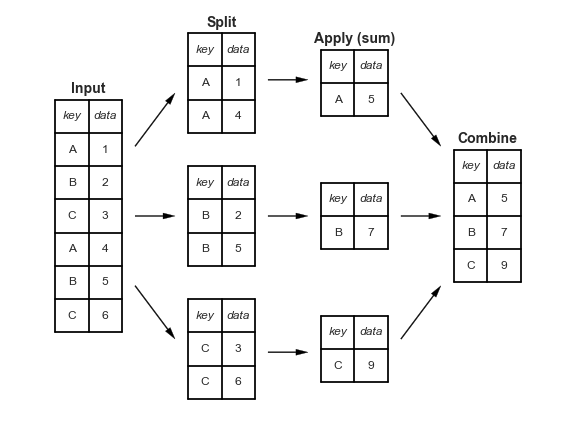

* The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
* The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
* The combine step merges the results of these operations into an output array.

In [166]:
df = pd.DataFrame({'key': ['A', 'C', 'A', 'B', 'A', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,C,1
2,A,2
3,B,3
4,A,4
5,C,5


In [167]:
df.groupby('key').sum()

,data
key,
A,6
B,3
C,6


## The GroupBy object

the most important operations made available by a GroupBy are aggregate, filter, transform, and apply.

### Column indexing

In [168]:
df.groupby('key')['data'].median()

key
A    2
B    3
C    3
Name: data, dtype: int64

### Iteration over groups

In [169]:
for (key, group) in df.groupby('key'):
    print("{0:30s} shape={1}".format(key, group.shape))

A                              shape=(3, 2)
B                              shape=(1, 2)
C                              shape=(2, 2)


In [172]:
df.groupby('key')['data'].describe()

,count,mean,std,min,25%,50%,75%,max
key,,,,,,,,
A,3.0,2.0,2.000000,0.0,1.0,2.0,3.0,4.0
B,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
C,2.0,3.0,2.828427,1.0,2.0,3.0,4.0,5.0


## Aggregate, filter, transform, apply

In [173]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Aggregation
It can take a string, a function, or a list thereof, and compute all the aggregates at once

In [174]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [175]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtering
A filtering operation allows you to drop data based on the group properties.

In [176]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

In [177]:
#### Transformation
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### Apply()
The apply() method lets you apply an arbitrary function to the group results. The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar

In [179]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


## Specifying the split key

### A list, array, series, or index providing the grouping keys
The key can be any series or list with a length matching that of the DataFrame

In [180]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

In [181]:
df['key']

0    A
1    B
2    C
3    A
4    B
5    C
Name: key, dtype: object

In [182]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

### A dictionary or series mapping index to group
provide a dictionary that maps index values to the group

In [183]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


### Any Python function
Similar to mapping, you can pass any Python function that will input the index value and output the group

In [186]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


### A list of valid keys
Further, any of the preceding key choices can be combined to group on a multi-index

In [187]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0
